# Derive Initial Velocity from Total Energy

In [1]:
%matplotlib widget
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
from smbbh_nu import SMBBH_NU
from plot_process import Plot_Result

## 0. Parameters

In [3]:
# Mass:
m1, m2 = 0.5, 0.5
mass_sum = m1 + m2
black_hole_mass = [m1, m2]

# Radius:
radius = 2
r1, r2 = radius*0.5, radius*0.5

# Eccentricity:
e = 0.3

# Time range:
t0, tf = 0, 100
tl = tf*10

# 3D Rotation:
angles = [np.pi/6, np.pi/4, np.pi/6]  # omega, I, Omega

In [4]:
# Galaxical Potential:
def potential(constant_c, comp_vector, r):
    c_term = (constant_c*comp_vector) / r
    first_term = 1/(r + r**3)
    second_term = np.arctan(r)/(r**2)
    V = c_term*(first_term - second_term)
    return V

In [5]:
c_0=0

## 1. Run the Test

In [6]:
case_1 = SMBBH_NU(black_hole_mass,
                  t0=t0,
                  tf=tf,
                  tl=tl, 
                  constant_c=c_0,
                  radius=radius,
                  eccentricity=e,
                  angles=angles,
                  potential_function=potential)

In [7]:
# run
case_1_dict = case_1.run()
for key in case_1_dict.keys():
    print(key)

no_rot_data
rot_data
no_rot_energy
no_rot_energy0
rot_energy
rot_energy0
rot_z_vel_ratio


In [8]:
rot_mod = "rotation"
plot = Plot_Result(case_1_dict, radius, t0, tf, tl=tl)

## 2. Plot 3D

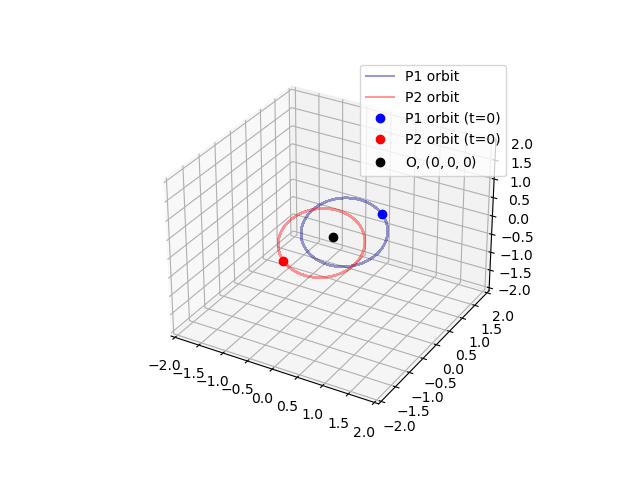

In [9]:
plot.plot_rk4_result(mode=rot_mod)

## 3. Plot Total Energy

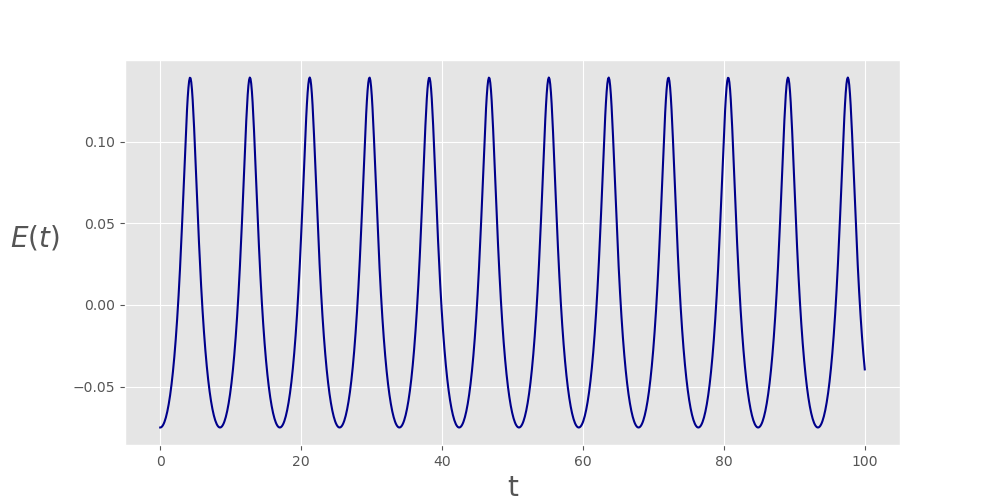

In [10]:
plot.plot_total_energy(mode=rot_mod)

## 4. Plot 2D Plane

#### X-Y

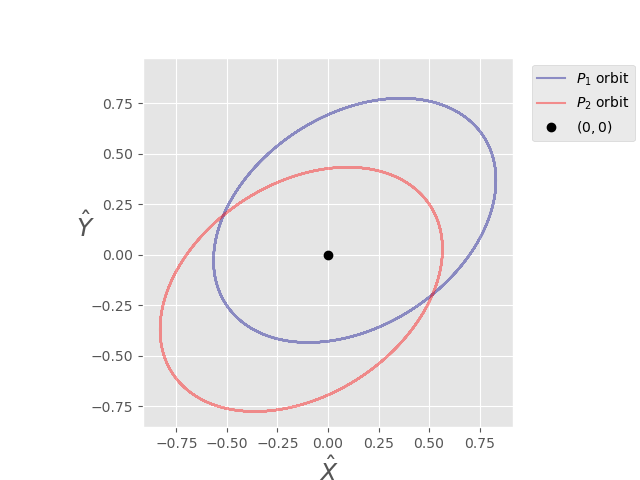

In [11]:
plot.plot_2D_plane_orbit(mode=rot_mod, plane_choose="x-y")

#### X-Z

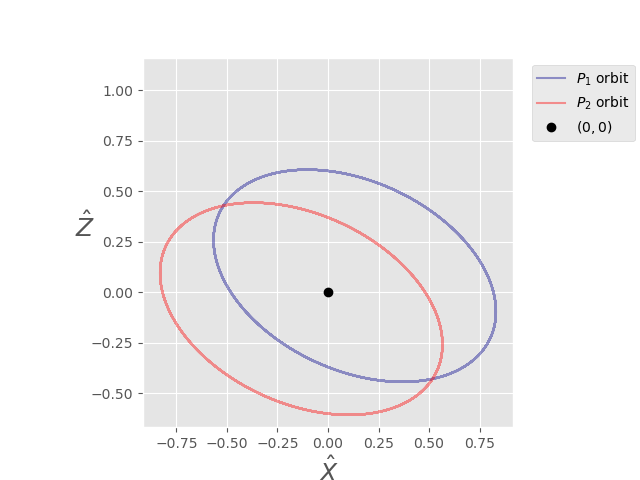

In [12]:
plot.plot_2D_plane_orbit(mode=rot_mod, plane_choose="x-z")

## 5. Plot Orbit-Time

#### Time-X

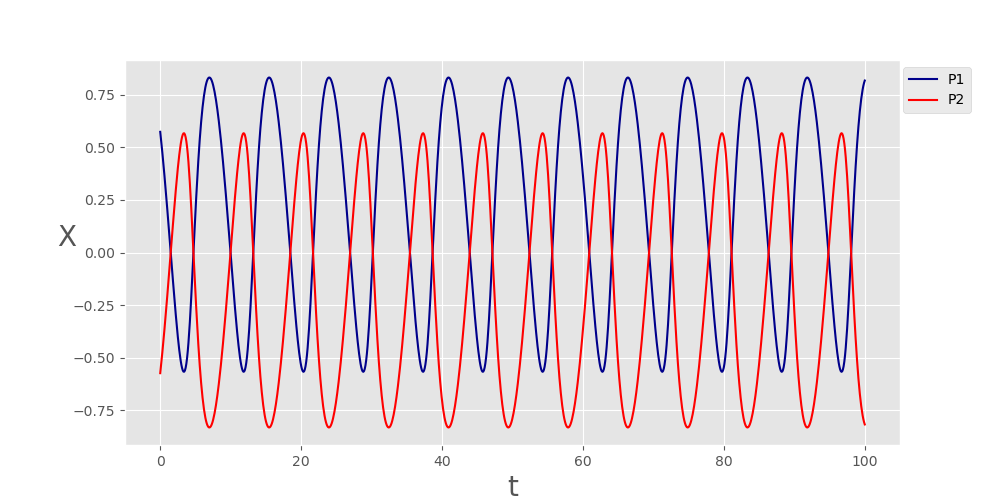

In [13]:
plot.plot_2D_time_orbit(mode=rot_mod, plane_choose="x")

#### Time-Y

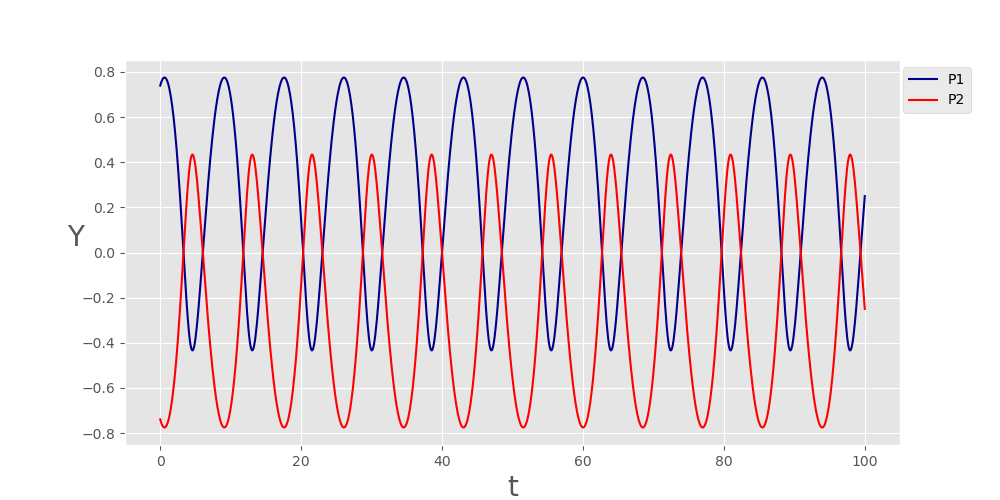

In [14]:
plot.plot_2D_time_orbit(mode=rot_mod, plane_choose="y")

#### Time-Z

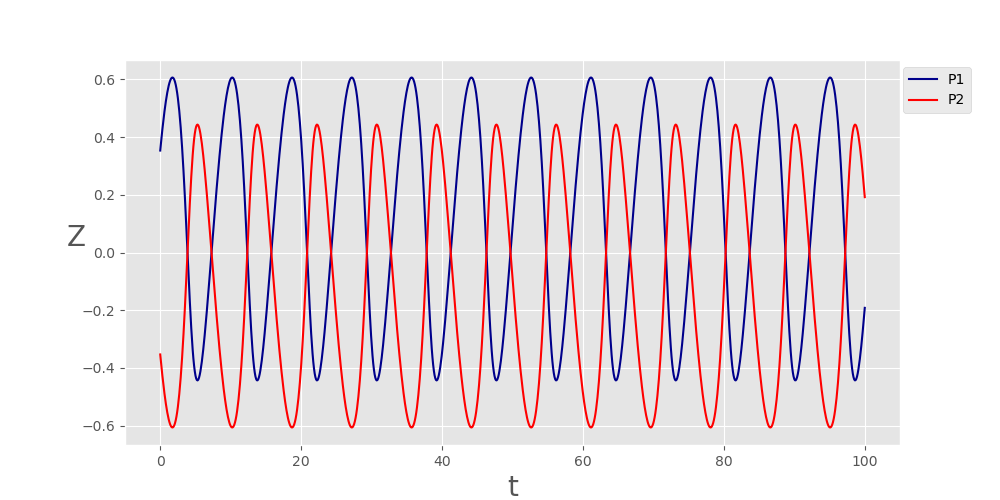

In [15]:
plot.plot_2D_time_orbit(mode=rot_mod, plane_choose="z")

## 6. $r_{1}, r_{2}$

#### $r_{1}$

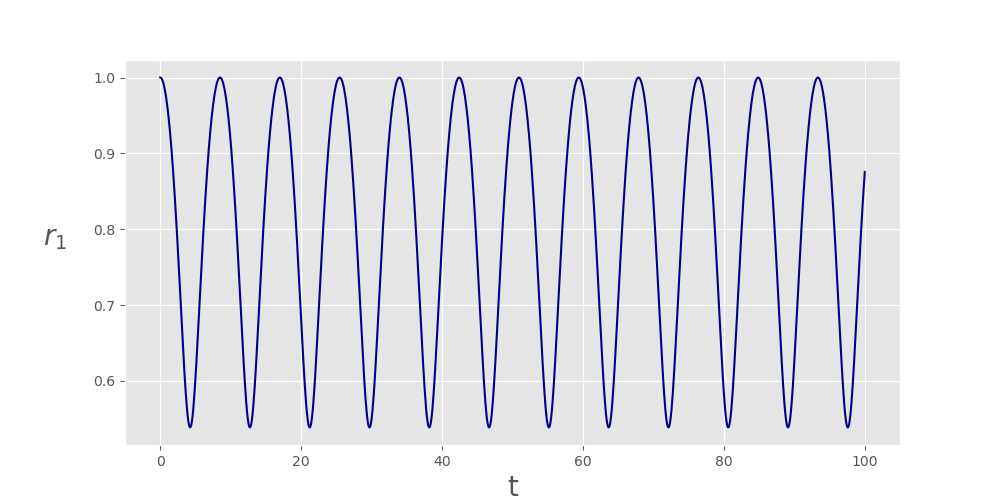

In [16]:
plot.plot_r_length_per_time(mode=rot_mod, particle="p1")

#### $r_{2}$

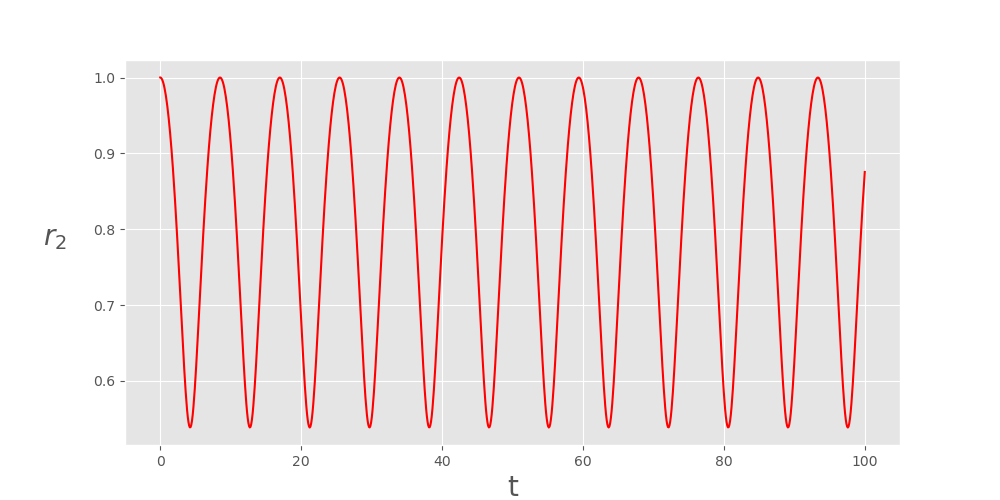

In [17]:
plot.plot_r_length_per_time(mode=rot_mod, particle="p2")

## 7. $r_{12}$


 minimum length : 1.08


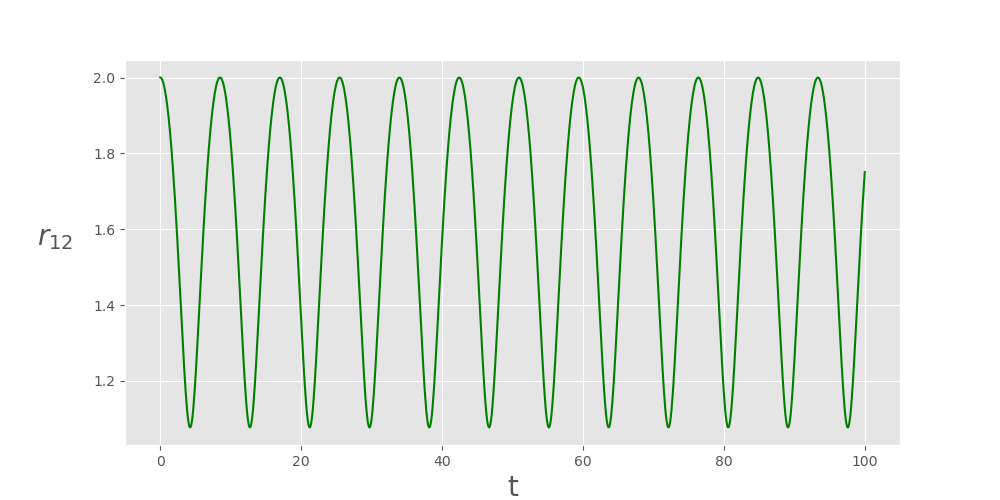

In [18]:
plot.plot_r12_length_per_time(mode=rot_mod)

## 8. $v1_{z}/v2_{z}$

In [19]:
vz_ratio = case_1_dict['rot_z_vel_ratio']
time_length = np.linspace(t0, tf, tl)

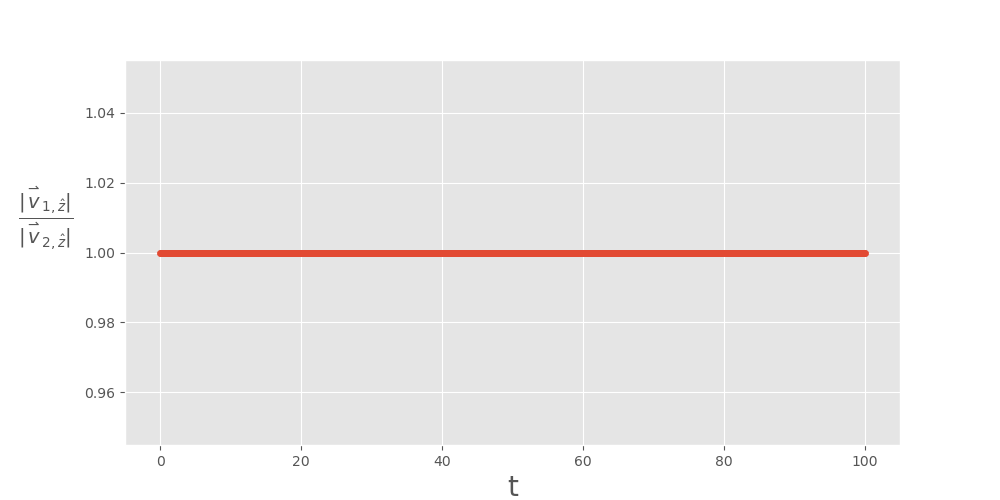

In [20]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.subplot()
plt.scatter(time_length, vz_ratio, s=20)
plt.xlabel("t", fontsize=20)
plt.ylabel(r"$\frac{|\overset{\rightharpoonup}{v}_{1,\hat{z}}|}{|\overset{\rightharpoonup}{v}_{2,\hat{z}}|}$        ", fontsize=20, rotation=0)
plt.show()

## 9. Initial Position

In [21]:
p1_orb = case_1_dict['rot_data']['p1_orbit']
p2_orb = case_1_dict['rot_data']['p2_orbit']
print(np.round(p1_orb[0], 4))
print(np.round(p2_orb[0], 4))

[0.5732 0.7392 0.3536]
[-0.5732 -0.7392 -0.3536]


In [22]:
# ani = plot.plot_orbit_video(mode=rot_mod, show_mode='html')
# plt.close()
# HTML(ani.to_jshtml(fps=10))